In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

2024-04-01 16:43:49.770915: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 16:43:49.771199: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 16:43:49.936410: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


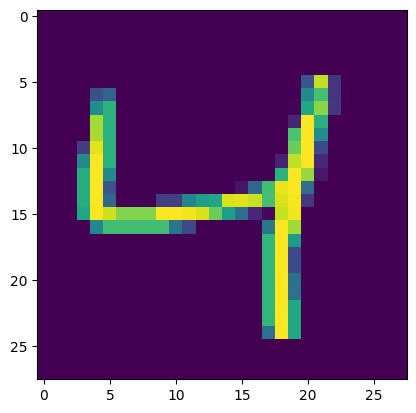

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [9]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8608 - loss: 0.4898 - val_accuracy: 0.9557 - val_loss: 0.1551
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9579 - loss: 0.1382 - val_accuracy: 0.9620 - val_loss: 0.1266
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9727 - loss: 0.0922 - val_accuracy: 0.9707 - val_loss: 0.0988
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9814 - loss: 0.0625 - val_accuracy: 0.9718 - val_loss: 0.0942
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9849 - loss: 0.0507 - val_accuracy: 0.9743 - val_loss: 0.0888
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9891 - loss: 0.0373 - val_accuracy: 0.9733 - val_loss: 0.0920
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9915 - loss: 0.0305 - val_accuracy: 0.9748 - val_loss: 0.0917
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9928 - loss: 0.024

In [10]:
y_pb = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [11]:
y_pd = y_pb.argmax(axis=1)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pd)

0.9791

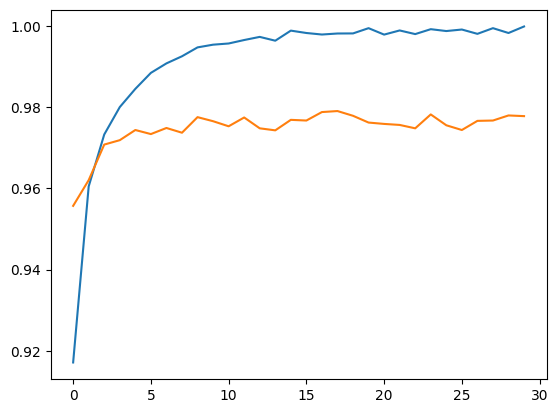

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

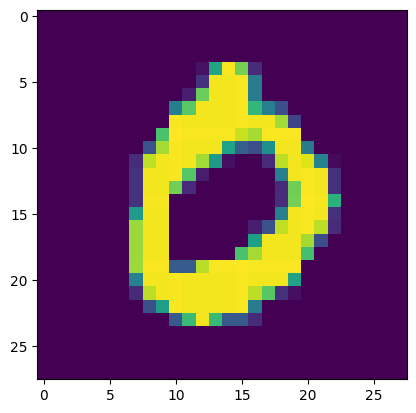

In [14]:
plt.imshow(X_test[3])

In [15]:
model.predict(X_test[3].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([0])

In [16]:
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test_values = test.values

In [17]:
print(test_values.shape)
print(X_test.shape)

(28000, 784)
(10000, 28, 28)


In [18]:
test_values_reshaped = test_values.reshape(28000, 28, 28)
test_values_reshaped.shape

(28000, 28, 28)

In [19]:
test_out = model.predict(test_values_reshaped)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [20]:
y =test_out.argmax(axis=1)
submission = pd.DataFrame(y, columns=['Label'])
submission.index.name = 'ImageId'
submission.index += 1
submission.to_csv('/kaggle/working/submission.csv')
print('Submission completed!')

Submission completed!
